In [7]:
pip install scikit-learn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 8.8 MB/s eta 0:00:0000:0100:01
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 8.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 8.9 MB/s eta 0:00:0000:0100:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and wil

In [8]:
pip install matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 8.7 MB/s eta 0:00:0000:0100:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.8/240.8 kB 4.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 8.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 7.6 MB/s eta 0:00:0000:0100:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/iss

In [16]:
pip install pandas

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 8.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.1/498.1 kB 6.8 MB/s eta 0:00:00a 0:00:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installatio

In [53]:
pip install mlxtend

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.0 MB/s eta 0:00:0000:0100:01
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: y

In [113]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as ps
from mlxtend.preprocessing import MeanCenterer
import random

In [74]:
#Load the data into pandas dataframe
X_og = ps.read_csv("accent-mfcc-data-1.data")
X_pd = X_og.copy()

target_labels = ["ES", "FR", "GE", "IT", "UK", "US"]

#Replace the target labels with numerical values

for i in range(len(X_pd)):
    if (X_pd.iloc[i,0] == "ES"):
        X_pd.iloc[i,0] = 0
    elif(X_pd.iloc[i,0] == "FR"):
        X_pd.iloc[i,0] = 1
    elif(X_pd.iloc[i,0] == "GE"):
        X_pd.iloc[i,0] = 2
    elif(X_pd.iloc[i,0] == "IT"):
        X_pd.iloc[i,0] = 3
    elif(X_pd.iloc[i,0] == "UK"):
        X_pd.iloc[i,0] = 4
    else:
        X_pd.iloc[i,0] = 5

#Retrieve targets and add into a numpy array

y_temp = X_pd.iloc[:,0]
y = y_temp.to_numpy()

#Retrieve data without the targets and add into a numpy array
without_labels = X_pd.drop(X_pd.columns[0], axis=1)
X = without_labels.to_numpy()

print(X)




[[10.98296717 -5.15744505  3.95206022 ... -4.50881099  2.33214701
  -6.22185741]
 [ 7.82710836 -5.47747194  7.81625728 ... -7.20404059 -0.0118469
  -6.46314403]
 [ 6.74408266 -5.68892029  6.54678866 ... -6.019237    1.35855949
  -6.35644131]
 ...
 [ 2.11690919 -4.44148193  5.35039236 ...  7.56614209 -0.60600998
  -2.24512866]
 [ 0.29961639  0.3248441   3.29991883 ...  4.66440568  1.19778939
  -2.23027508]
 [ 3.2142543  -3.13515222  1.12269128 ... 10.60573412  0.3494821
  -5.98328089]]


In [55]:
#Function to computte the PCA decomposition
def components(dataset, number):
    U,D,V = np.linalg.svd(dataset, full_matrices=True)
    return V[:number, :]

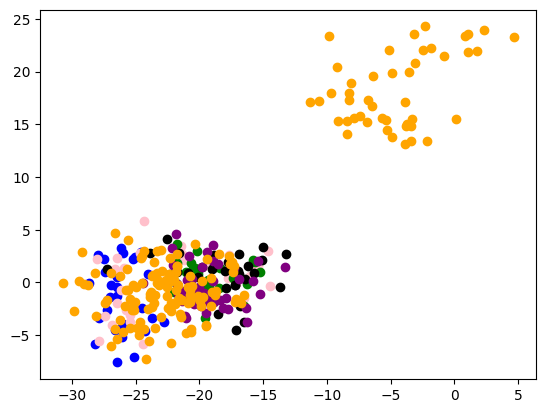

In [69]:
#Center the data
centered_X = X.copy()
mc = MeanCenterer().fit(centered_X)
mc.transform(centered_X)

#Compute the new basis Z of the data using PCA to find the 
#top 2 principle components and multiplying that with the centered data

W = components(centered_X, 2)
transposed = np.transpose(W)
Z = np.matmul(centered_X, transposed)

zrows, zcols = Z.shape

#Plot the datapoints in the new basis according to their class

for i in range(zrows):
    if (y[i] == 0):
        plt.scatter(Z[i][0], Z[i][1], color = 'blue')
    elif (y[i] == 1):
        plt.scatter(Z[i][0], Z[i][1], color = 'pink')
    elif (y[i] == 2):
        plt.scatter(Z[i][0], Z[i][1], color = 'green')
    elif (y[i] == 3):
        plt.scatter(Z[i][0], Z[i][1], color = 'black')
    elif (y[i] == 4):
        plt.scatter(Z[i][0], Z[i][1], color = 'purple')
    elif(y[i] == 5):
        plt.scatter(Z[i][0], Z[i][1], color = 'orange') 
plt.show()


In [177]:
#Multiclass Perceptron

def perceptron(X, y):
    w = [[0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,0,0,1]]

    biasCol = np.ones((X.shape[0],1), dtype=int)
    newX = np.hstack((X, biasCol))

    for i in range(10):
        picked = []
        pickedFlag = True
        for j in range(newX.shape[0]):
            while (pickedFlag == True):
                fV = random.choice(newX)
                pickedFlag = False
                for element in picked:
                    if (np.array_equal(element, fV)):
                        pickedFlag = True
                        break
            picked.append(fV.copy())
            for k in range(newX.shape[0]):
                if (np.array_equal(newX[k,:],fV)):
                    index = k
                    break
            
            dict = {}
        
            for i in range (len(w)):
                val = np.matmul(w[i],fV)
                dict[i] = val
            
            y_current = max(dict, key=dict.get)
            y_target = y[index]

            if (y_current != y_target):
                w[y_current] = w[y_current] - fV
                w[y_target] = w[y_target] + fV
    
    print(w[0])



        



perceptron(X,y)

[ -5.17824548   5.04940136  -5.98072111 -10.56253089   8.00021959
 -10.34058427  11.53076578  -5.0725305   -2.29795357   2.36544286
  -4.62224233   5.53907975   0.        ]
